### Mas primeiro: Quem é Pandas e o que ele faz?

Pandas é uma biblioteca open source que proporciona alta performace no tratamento e manipulação de estrutura de dados.
Principais conceitos e funções:
- Series - One-dimensional ndarray with axis labels (including time series).
- DataFrame - Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.
- Read - pd.read()
- ...

# Análise da população brasileira

Uma coisa importante na análise de dados é entender o contexto dos dados coletados, qual a realidade que eles estão inseridos. 

Por exemplo:
**Parece aceitável que mais da metade do congresso seja formada por homens brancos se esse grupo demográfico for mais da metade da população?** Nesse caso nós poderíamos pensar que existes mais indivíduos desse grupo na população e que por isso eles tem uma grande representatividade no congresso.

Já que estamos falando do congresso, vamos então tentar entender qual é o contexto das informações que vimos na análise anterior:
- Qual o perfil da população brasileira quanto a gênero, cor ou raça e situação do domicílio?
- Como esse perfil se comporta quando analisamos por estado?


Os dados aqui analisados são do censo de 2010, disponível pelo SIDRA [Sistema IBGE de Recuperação Automática](https://sidra.ibge.gov.br/home/pms/brasil) [Nessa tabela](https://sidra.ibge.gov.br/tabela/3175)

## Preparando os dados

In [86]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [87]:
populacao = pd.read_csv('data/populacao/populacao_genero_cor_2010.csv', delimiter=';', header=2)
populacao

,Unidade da Federação,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Unnamed: 6
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


In [88]:
populacao = populacao[:57672]
populacao

,Unidade da Federação,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Unnamed: 6
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


In [89]:
populacao.columns

Index(['Unidade da Federação', 'Sexo', 'Idade', 'Ano', 'Cor ou raça',
       'Situação do domicílio', 'Unnamed: 6'],
      dtype='object')

In [90]:
populacao = populacao.rename(columns={'Unnamed: 6': "Quantidade", 'Unidade da Federação': "Estado"})
populacao[:15]

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


In [91]:
populacao = populacao.replace('-', 0)
populacao[:15]

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


In [92]:
populacao.dtypes

Estado                    object
Sexo                      object
Idade                     object
Ano                      float64
Cor ou raça               object
Situação do domicílio     object
Quantidade                object
dtype: object

In [99]:
populacao['Quantidade'] = populacao['Quantidade'].astype(int)
populacao['Ano'] = populacao['Ano'].astype(object)
populacao.dtypes

Estado                   object
Sexo                     object
Idade                    object
Ano                      object
Cor ou raça              object
Situação do domicílio    object
Quantidade                int64
dtype: object

In [100]:
populacao[:15]

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
0,Rondônia,Homens,0 a 4 anos,2010,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010,Indígena,Rural,793


## Qual o perfil da população brasileira quanto a gênero, cor ou raça e situação do domicílio?

### Gênero

In [110]:
genero = populacao.groupby('Sexo').sum()
genero

,Quantidade
Sexo,
Homens,93406990
Mulheres,97348809


In [113]:
genero_porcentagem = genero['Quantidade']/sum(genero['Quantidade'])
genero_porcentagem

Sexo
Homens      0.489668
Mulheres    0.510332
Name: Quantidade, dtype: float64

Verificar estilos disponíveis para os gráficos no matplotlib
É possível como eles se parecem [nesse link](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html)


In [119]:
plt.style.available

['_classic_test',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-pastel',
 'fast',
 'seaborn-dark',
 'Solarize_Light2',
 'bmh',
 'grayscale',
 'seaborn-notebook',
 'seaborn-dark-palette',
 'seaborn-muted',
 'seaborn',
 'ggplot',
 'seaborn-talk',
 'seaborn-deep',
 'seaborn-colorblind',
 'dark_background',
 'classic',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn-white',
 'seaborn-poster']

Selecionar um estilo

In [120]:
plt.style.use('fivethirtyeight')

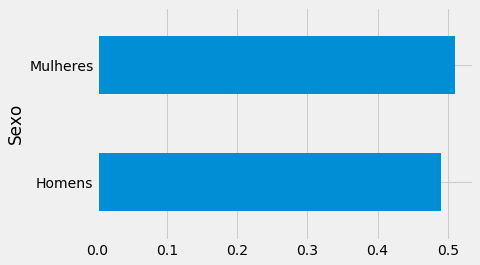

In [117]:
genero_porcentagem.plot(kind='barh')

In [108]:
populacao.groupby('Idade').sum()

,Quantidade
Idade,
0 a 4 anos,13796158
10 a 14 anos,17166761
100 anos ou mais,24236
15 anos,3574929
16 anos,3410704
17 anos,3372241
18 anos,3367172
19 anos,3265826
20 anos,3389729


In [105]:
populacao.groupby('Cor ou raça').sum()

,Quantidade
Cor ou raça,
Amarela,2084288
Branca,91051646
Indígena,817963
Parda,82277333
Preta,14517961
Sem declaração,6608


In [106]:
populacao.groupby(['Sexo', 'Cor ou raça']).sum()

Quantidade
Sexo     Cor ou raça               
Homens   Amarela             951404
         Branca            43652488
         Indígena            409907
         Parda             40861864
         Preta              7526611
         Sem declaração        4716
Mulheres Amarela            1132884
         Branca            47399158
         Indígena            408056
         Parda             41415469
         Preta              6991350
         Sem declaração        1892

In [107]:
populacao.groupby(['Sexo', 'Cor ou raça', 'Estado']).sum()

Quantidade
Sexo     Cor ou raça    Estado                         
Homens   Amarela        Acre                       6124
                        Alagoas                   15697
                        Amapá                      3067
                        Amazonas                  14654
                        Bahia                     70787
                        Ceará                     45035
                        Distrito Federal          17914
                        Espírito Santo             9683
                        Goiás                     43955
                        Maranhão                  33334
                        Mato Grosso               16382
                        Mato Grosso do Sul        14246
                        Minas Gerais              83495
                        Paraná                    59619
                        Paraíba                   20493
                        Pará                      31629
                        Pernambuco                34939
                        Piauí                     30240
                        Rio Grande do Norte       13620
                        Rio Grande do Sul         17317
                        Rio de Janeiro            54076
                        Rondônia                  10126
                        Roraima                    1954
                        Santa Catarina            13013
                        Sergipe                   11023
                        São Paulo                267403
                        Tocantins                 11579
         Branca         Acre                      84678
                        Alagoas                  464599
                        Amapá                     76381
...                                                 ...
Mulheres Preta          Sergipe                   87749
                        São Paulo               1101511
                        Tocantins                 56448
         Sem declaração Acre                          4
                        Alagoas                       2
                        Amapá                         0
                        Amazonas                      1
                        Bahia                       285
                        Ceará                        31
                        Distrito Federal             65
                        Espírito Santo               14
                        Goiás                        28
                        Maranhão                     24
                        Mato Grosso                  99
                        Mato Grosso do Sul            3
                        Minas Gerais                 94
                        Paraná                       35
                        Paraíba                      27
                        Pará                         59
                        Pernambuco                   27
                        Piauí                         1
                        Rio Grande do Norte          15
                        Rio Grande do Sul            48
                        Rio de Janeiro              187
                        Rondônia                     23
                        Roraima                       0
                        Santa Catarina               50
                        Sergipe                      19
                        São Paulo                   750
                        Tocantins                     1

[324 rows x 1 columns]